In [1]:
%pip install -r requirements.txt

import sys
print(f"Python {sys.version}")

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import confusion_matrix
from myo_utils import *

plt.rcParams.update({'figure.max_open_warning': 0})
plt.rcParams['figure.figsize'] = FIGURE_SIZE

Note: you may need to restart the kernel to use updated packages.
Python 3.11.14 | packaged by conda-forge | (main, Jan 26 2026, 23:39:55) [MSC v.1944 64 bit (AMD64)]


In [2]:
train, train_labels, valid, valid_labels, test, test_labels = load_data_curated()

../myo-readings-dataset/_readings_right_hand/12345-1/0.txt
../myo-readings-dataset/_readings_right_hand/12345-1/1.txt
../myo-readings-dataset/_readings_right_hand/12345-1/2.txt
../myo-readings-dataset/_readings_right_hand/12345-1/3.txt
../myo-readings-dataset/_readings_right_hand/12345-1/4.txt
../myo-readings-dataset/_readings_right_hand/12345-1/5.txt
../myo-readings-dataset/_readings_right_hand/12345-1/6.txt
../myo-readings-dataset/_readings_right_hand/12345-1/7.txt
../myo-readings-dataset/_readings_right_hand/21547-1/0.txt
../myo-readings-dataset/_readings_right_hand/21547-1/1.txt
../myo-readings-dataset/_readings_right_hand/21547-1/2.txt
../myo-readings-dataset/_readings_right_hand/21547-1/3.txt
../myo-readings-dataset/_readings_right_hand/21547-1/4.txt
../myo-readings-dataset/_readings_right_hand/21547-1/5.txt
../myo-readings-dataset/_readings_right_hand/21547-1/6.txt
../myo-readings-dataset/_readings_right_hand/21547-1/7.txt
../myo-readings-dataset/_readings_right_hand/45612-1/0.t

In [3]:
# train, train_labels, valid, valid_labels, test, test_labels = load_data_all()

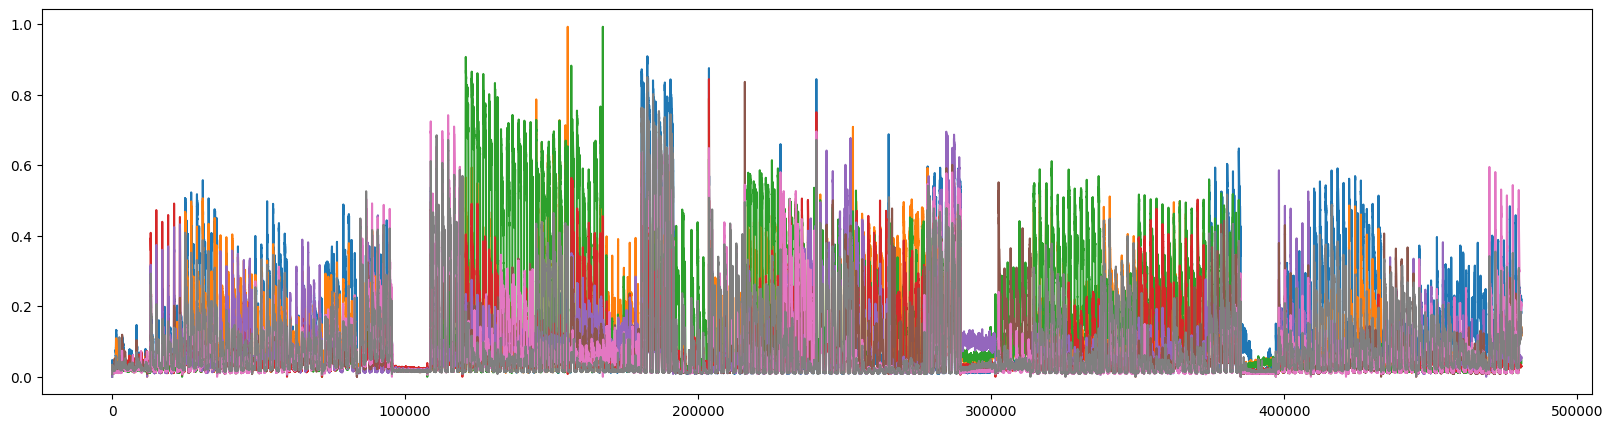

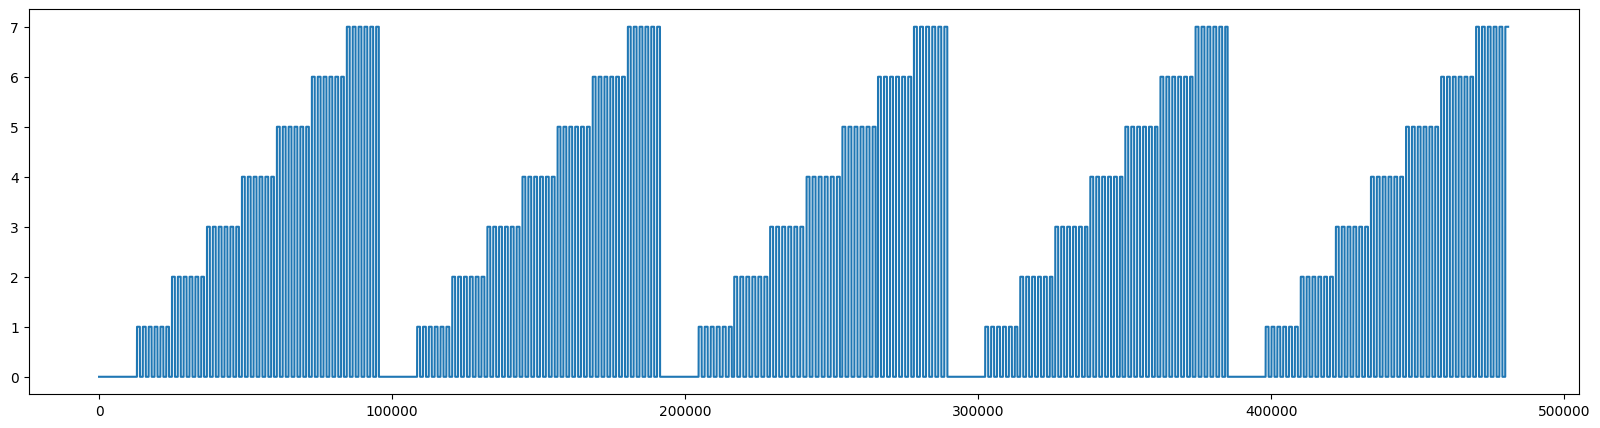

In [4]:
plt.figure()
plt.plot(train)
plt.figure()
plt.plot(train_labels)

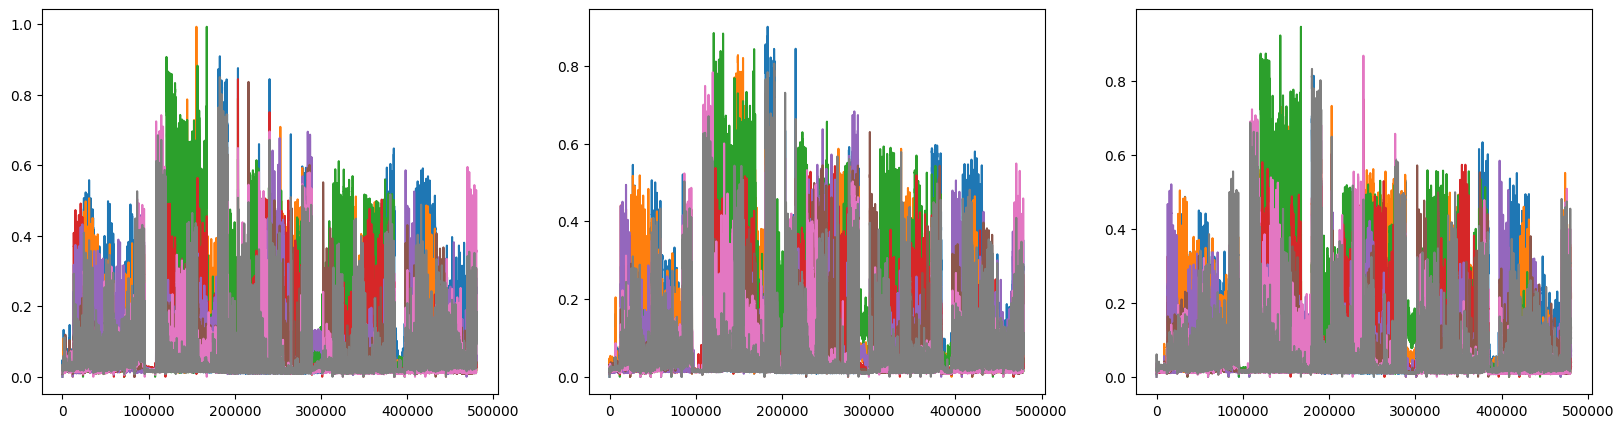

In [ ]:
fig, ax = plt.subplots(1, 3)
ax[0].plot(train)
ax[1].plot(valid)
ax[2].plot(test)

In [6]:
model = keras.Sequential([
    keras.layers.Dense(LAYER_SIZES[0], activation = "relu", input_shape = (NUM_EMG_CHANNELS,)),
    keras.layers.Dense(LAYER_SIZES[1], activation = "relu"),
    keras.layers.Dense(LAYER_SIZES[2], activation = "relu"),
    keras.layers.Dense(NUM_GESTURES, activation = "sigmoid")
])

opt = keras.optimizers.Adam(learning_rate = LEARNING_RATE)
loss = tf.keras.losses.SparseCategoricalCrossentropy()
model.compile(optimizer = opt, loss = loss, metrics = ["accuracy"])

c:\Users\anony\anaconda3\envs\myo-keras-gpu\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model_checkpoint = ModelCheckpoint(WEIGHTS_FILE, save_weights_only = True)
early_stopping = EarlyStopping(monitor = 'val_loss', patience = PATIENCE)
history = model.fit(train, train_labels, 
                    validation_data = (valid, valid_labels), 
                    epochs = EPOCHS, 
                    callbacks = [early_stopping, model_checkpoint])
model.load_weights(WEIGHTS_FILE)

Epoch 1/20
15028/15028 ━━━━━━━━━━━━━━━━━━━━ 53s 3ms/step - accuracy: 0.8984 - loss: 0.3688 - val_accuracy: 0.8225 - val_loss: 0.6575
Epoch 2/20
15028/15028 ━━━━━━━━━━━━━━━━━━━━ 48s 3ms/step - accuracy: 0.9302 - loss: 0.2507 - val_accuracy: 0.8358 - val_loss: 0.6917
Epoch 3/20
15028/15028 ━━━━━━━━━━━━━━━━━━━━ 50s 3ms/step - accuracy: 0.9380 - loss: 0.2143 - val_accuracy: 0.8121 - val_loss: 0.8168
Epoch 4/20
15028/15028 ━━━━━━━━━━━━━━━━━━━━ 50s 3ms/step - accuracy: 0.9436 - loss: 0.1901 - val_accuracy: 0.8126 - val_loss: 0.9088
Epoch 5/20
15028/15028 ━━━━━━━━━━━━━━━━━━━━ 52s 3ms/step - accuracy: 0.9475 - loss: 0.1732 - val_accuracy: 0.8173 - val_loss: 0.9349
Epoch 6/20
15028/15028 ━━━━━━━━━━━━━━━━━━━━ 54s 4ms/step - accuracy: 0.9510 - loss: 0.1594 - val_accuracy: 0.8149 - val_loss: 1.0331


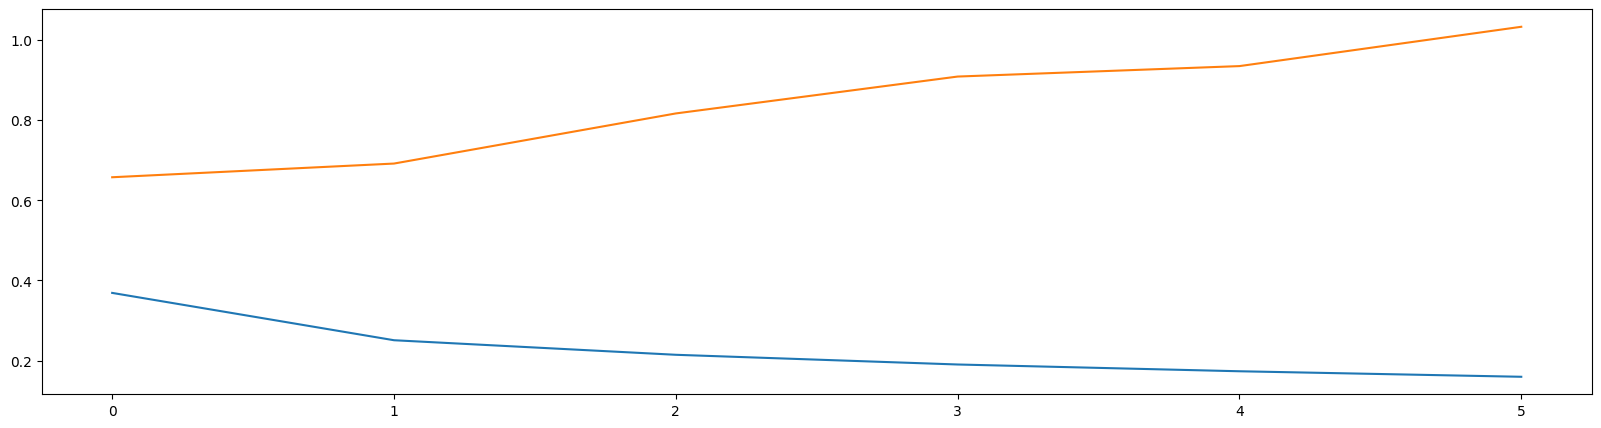

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

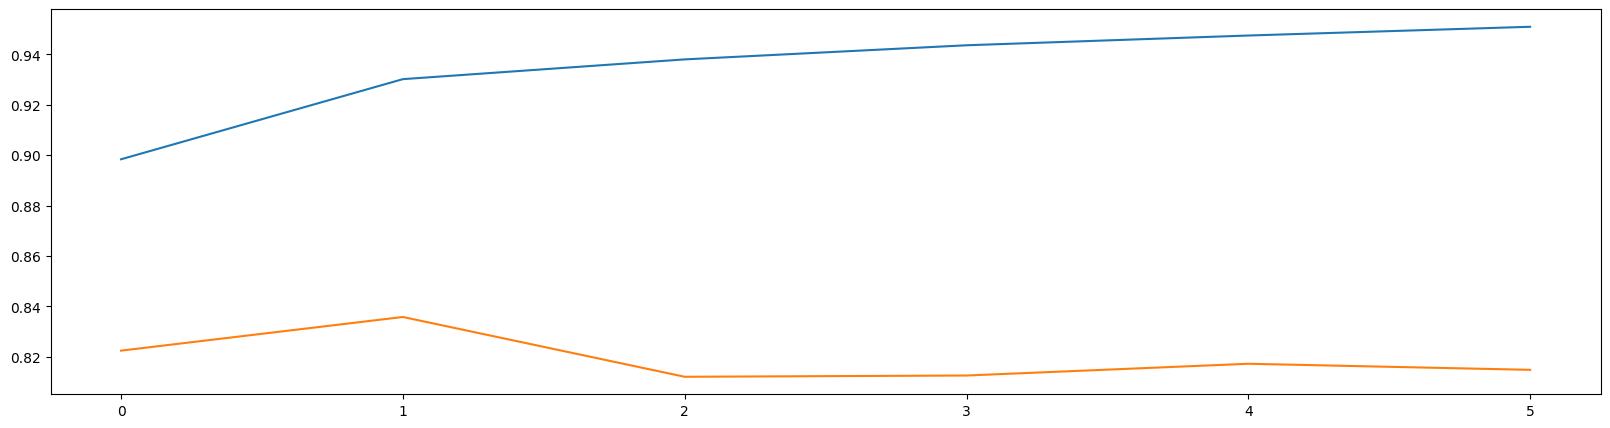

In [9]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [10]:
model.evaluate(test, test_labels)

15012/15012 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - accuracy: 0.7778 - loss: 1.5372


[1.5372132062911987, 0.7777671217918396]

In [11]:
predictions = model.predict(test)

15012/15012 ━━━━━━━━━━━━━━━━━━━━ 15s 996us/step


In [12]:
predicted_labels = np.argmax(predictions, axis=1)
conf = confusion_matrix(test_labels, predicted_labels, normalize="pred")
conf

array([[7.79075472e-01, 1.17847831e-01, 6.85898284e-02, 9.46068093e-02,
        6.42775882e-02, 1.11209015e-01, 1.73734921e-01, 1.01726016e-01],
       [3.70152565e-02, 7.87011140e-01, 0.00000000e+00, 1.66716883e-02,
        4.39893819e-03, 7.88387516e-03, 0.00000000e+00, 2.51734618e-02],
       [2.76791727e-02, 3.31832188e-04, 8.35693176e-01, 2.99956480e-02,
        9.40462647e-03, 1.12229282e-02, 4.76443365e-02, 0.00000000e+00],
       [1.96167452e-02, 3.79236786e-04, 0.00000000e+00, 7.59700044e-01,
        1.59271900e-03, 2.07299541e-02, 3.08777786e-02, 4.75944722e-03],
       [2.00341876e-02, 1.30836691e-02, 2.88033170e-02, 0.00000000e+00,
        8.18430034e-01, 1.23359458e-02, 4.84030043e-02, 1.43356844e-03],
       [3.07597147e-02, 2.46503911e-03, 1.08508667e-02, 9.49750594e-02,
        3.20819113e-02, 6.92436117e-01, 7.74599803e-02, 5.16084638e-04],
       [5.15404234e-02, 3.84451292e-02, 8.82184288e-05, 3.51511499e-03,
        1.48653773e-02, 1.41863377e-01, 6.16872771e-01, 3.

In [13]:
legend = GESTURE_LABELS

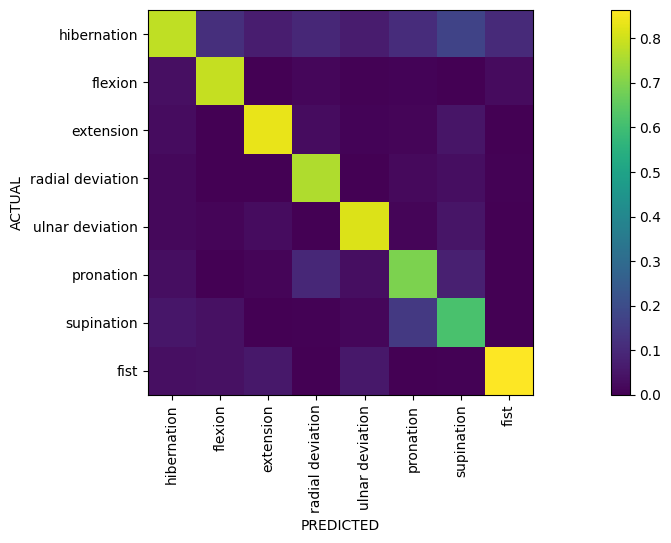

In [14]:
plt.imshow(conf)
plt.ylabel("ACTUAL")
plt.xlabel("PREDICTED")
plt.yticks(np.arange(len(legend)), legend)
plt.xticks(np.arange(len(legend)), legend, rotation='vertical')
plt.colorbar()

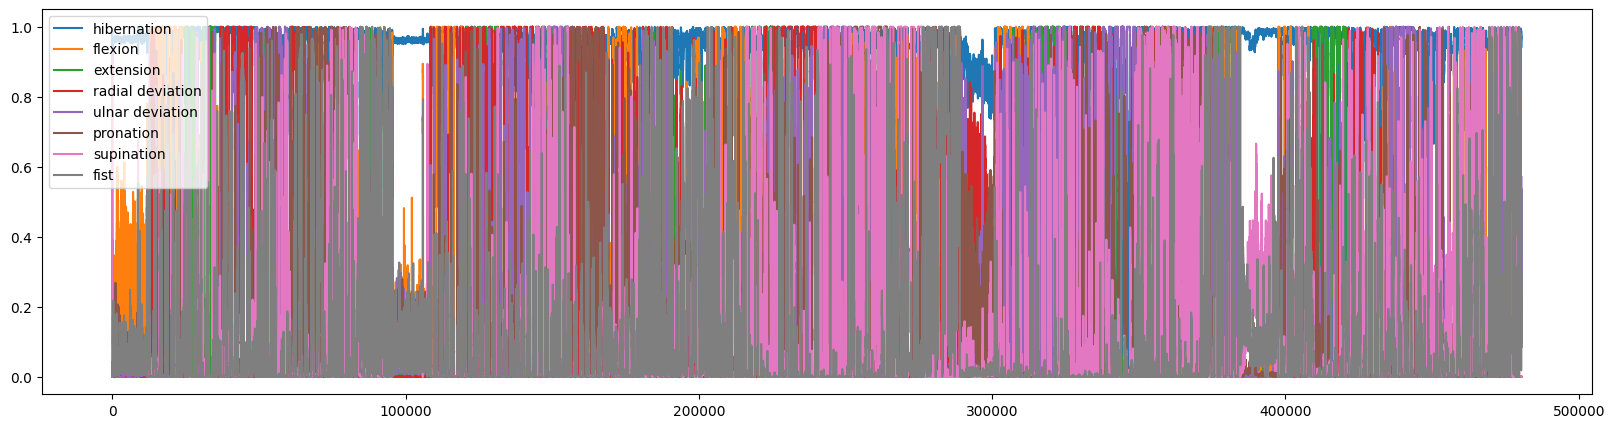

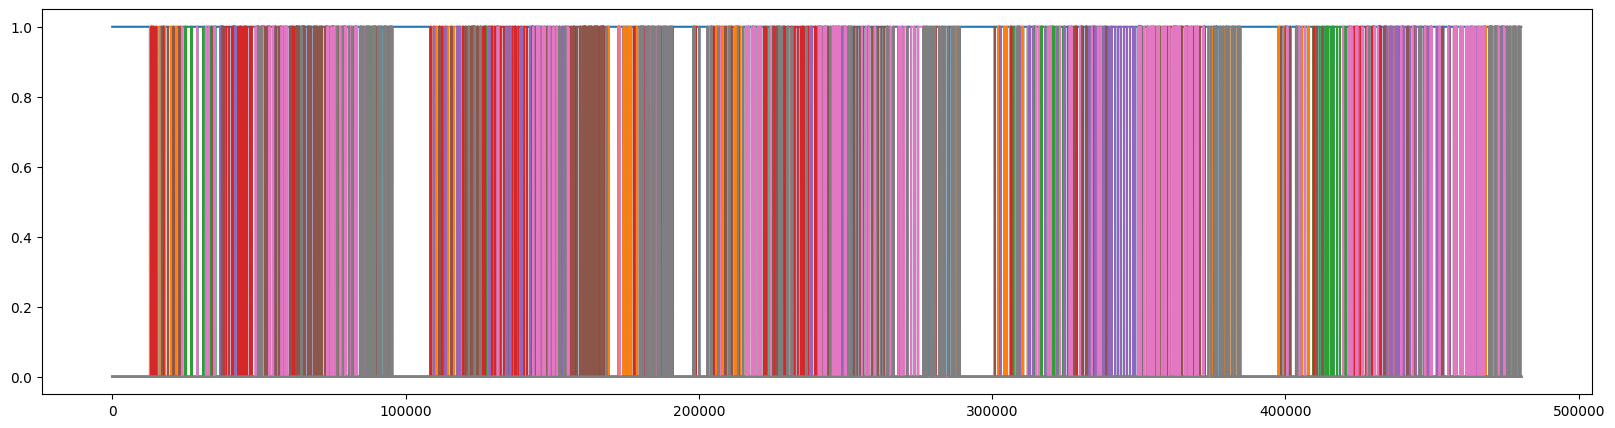

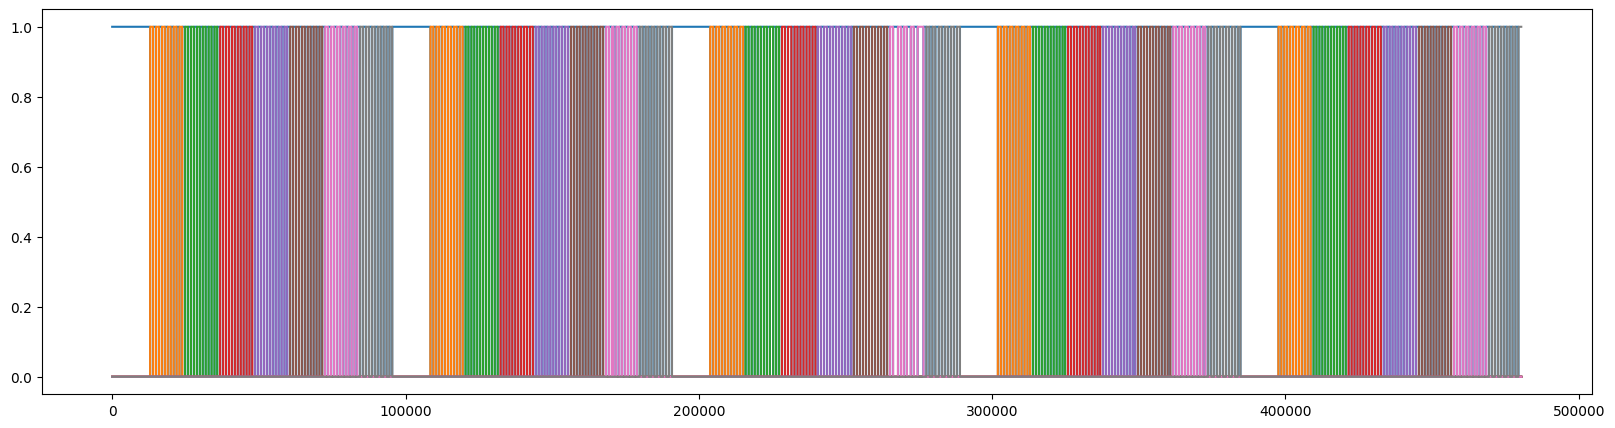

In [15]:
plt.figure()
plt.plot(predictions)
plt.legend(legend, loc = "upper left")

predicted_labels_onehot = keras.utils.to_categorical(predicted_labels, num_classes = NUM_GESTURES)
test_labels_onehot = keras.utils.to_categorical(test_labels, num_classes = NUM_GESTURES)

plt.figure()
plt.plot(predicted_labels_onehot)

plt.figure()
plt.plot(test_labels_onehot)

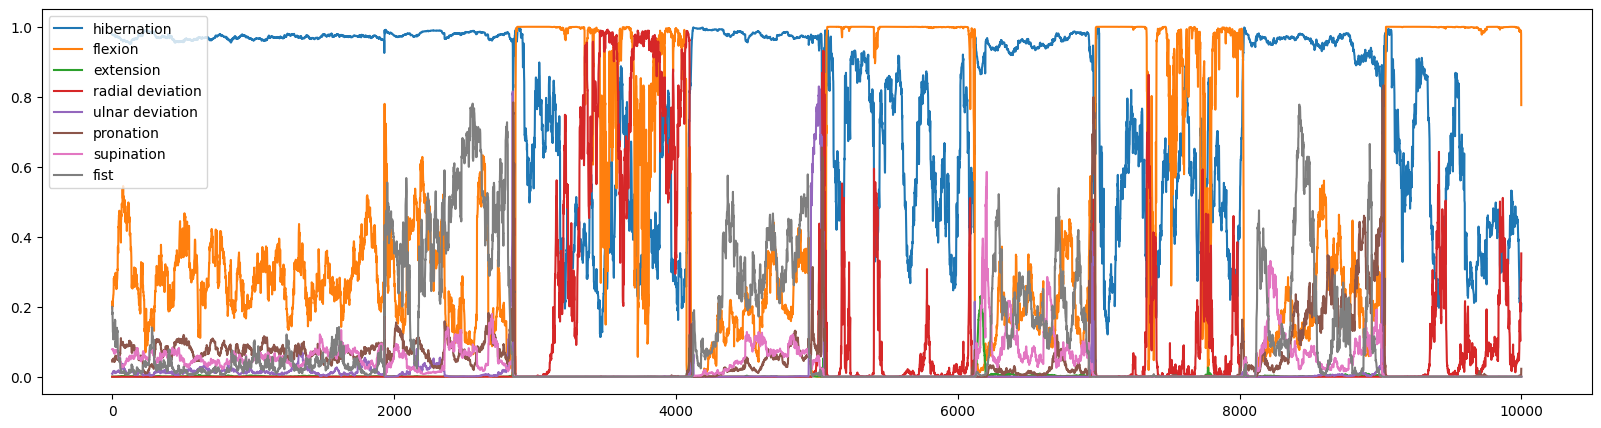

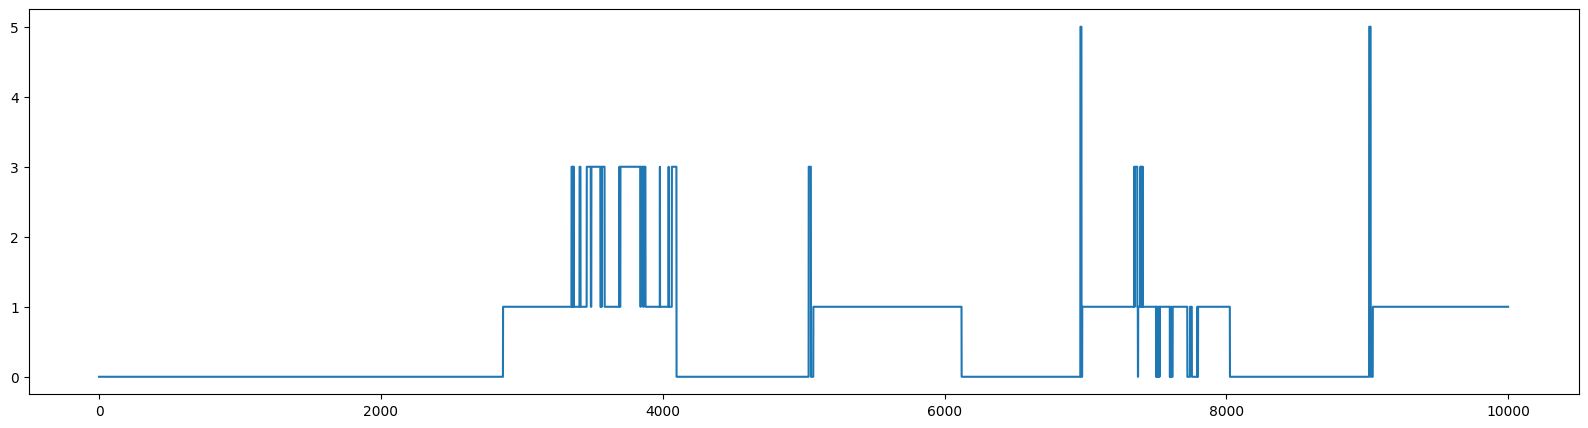

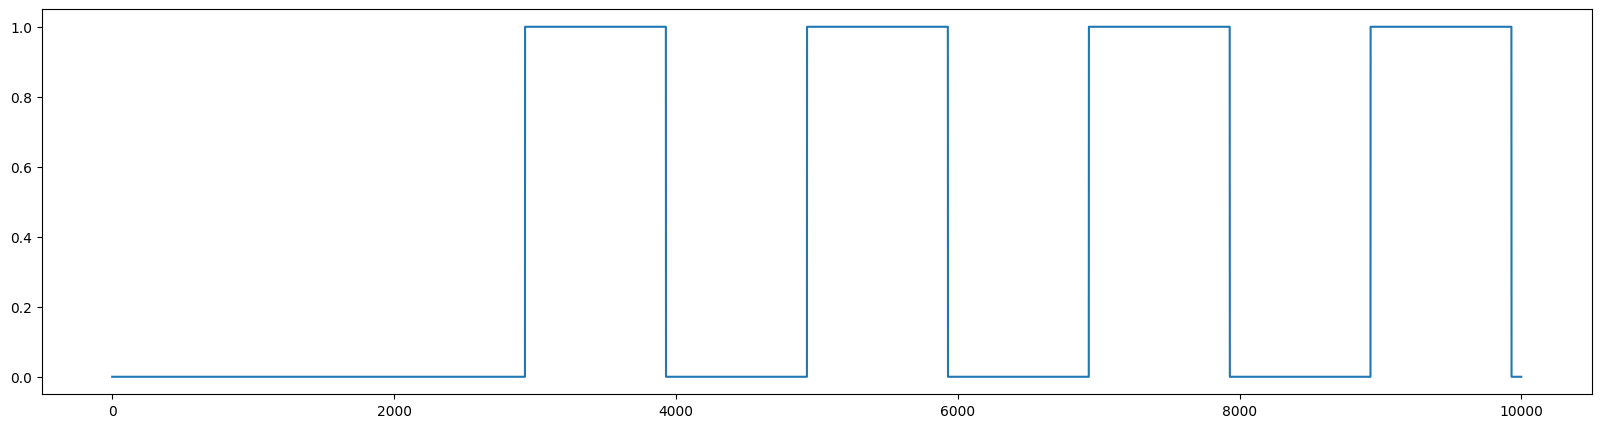

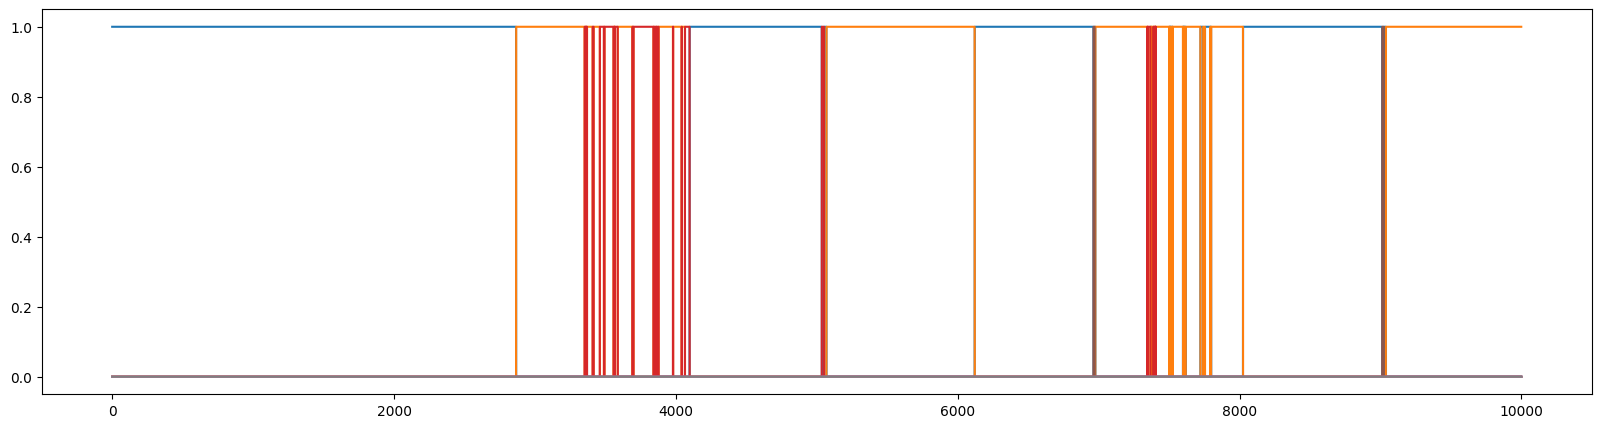

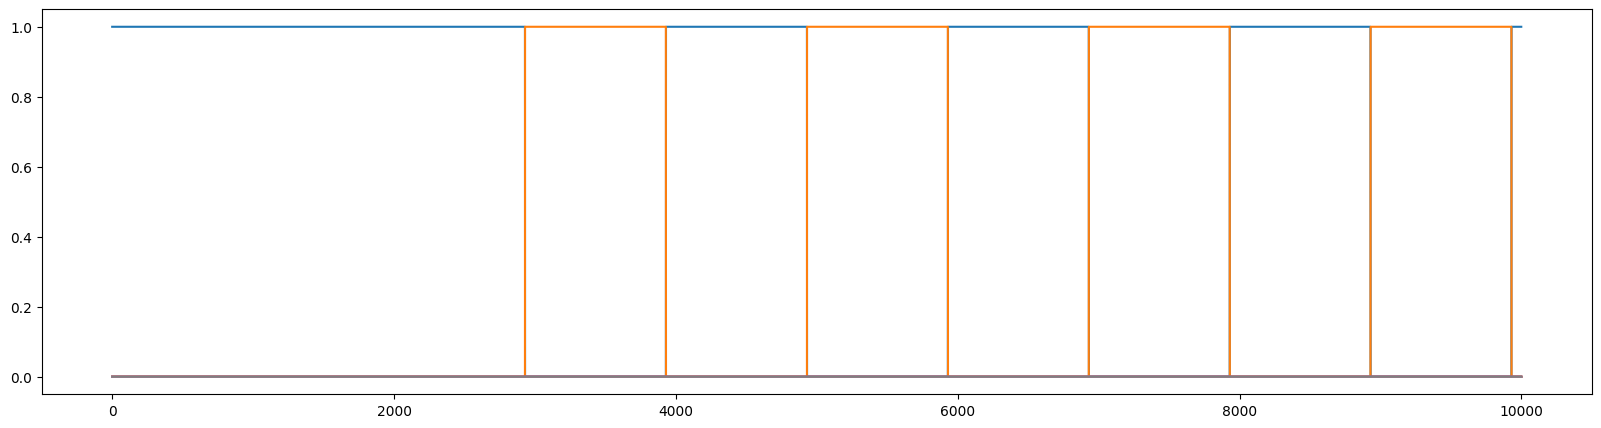

In [16]:
plt.figure()
plt.plot(predictions[10000:20000])
plt.legend(legend, loc = "upper left")
plt.figure()
plt.plot(predicted_labels[10000:20000])
plt.figure()
plt.plot(test_labels[10000:20000])
plt.figure()
plt.plot(predicted_labels_onehot[10000:20000])
plt.figure()
plt.plot(test_labels_onehot[10000:20000])

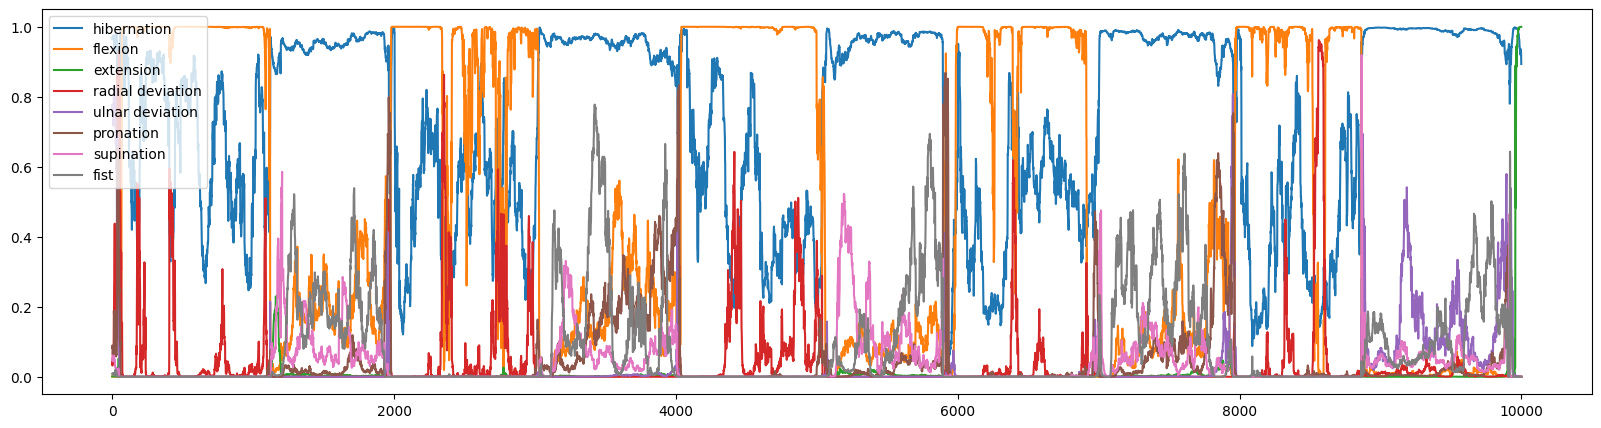

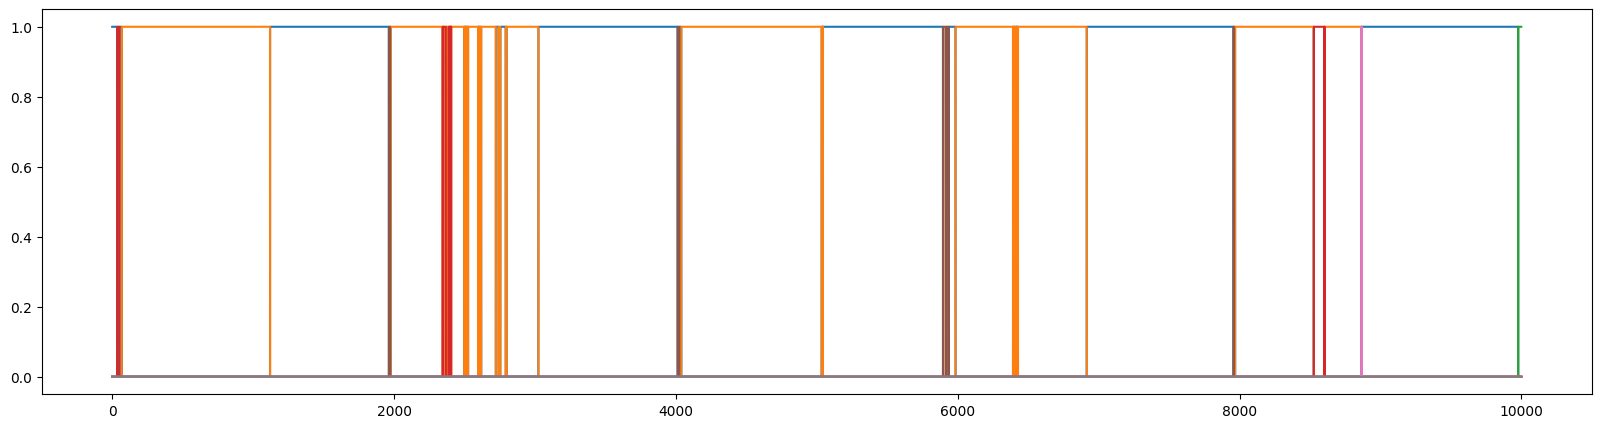

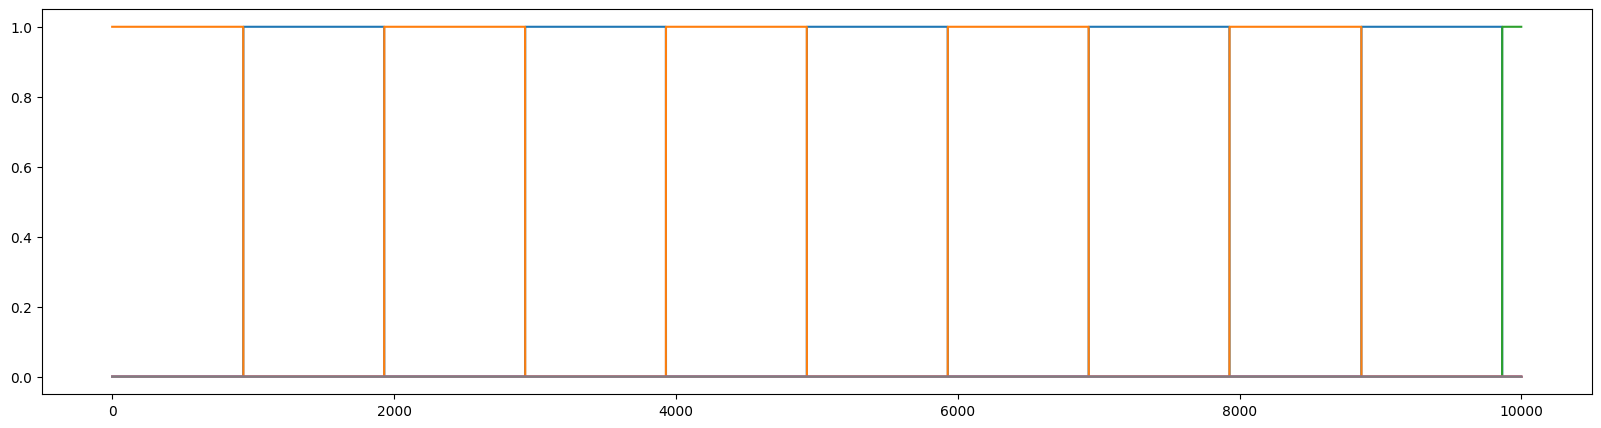

In [17]:
plt.figure()
plt.plot(predictions[15000:25000])
plt.legend(legend, loc = "upper left")
plt.figure()
plt.plot(predicted_labels_onehot[15000:25000])
plt.figure()
plt.plot(test_labels_onehot[15000:25000])

In [18]:
training_analysis = model.predict(train)

15028/15028 ━━━━━━━━━━━━━━━━━━━━ 13s 887us/step


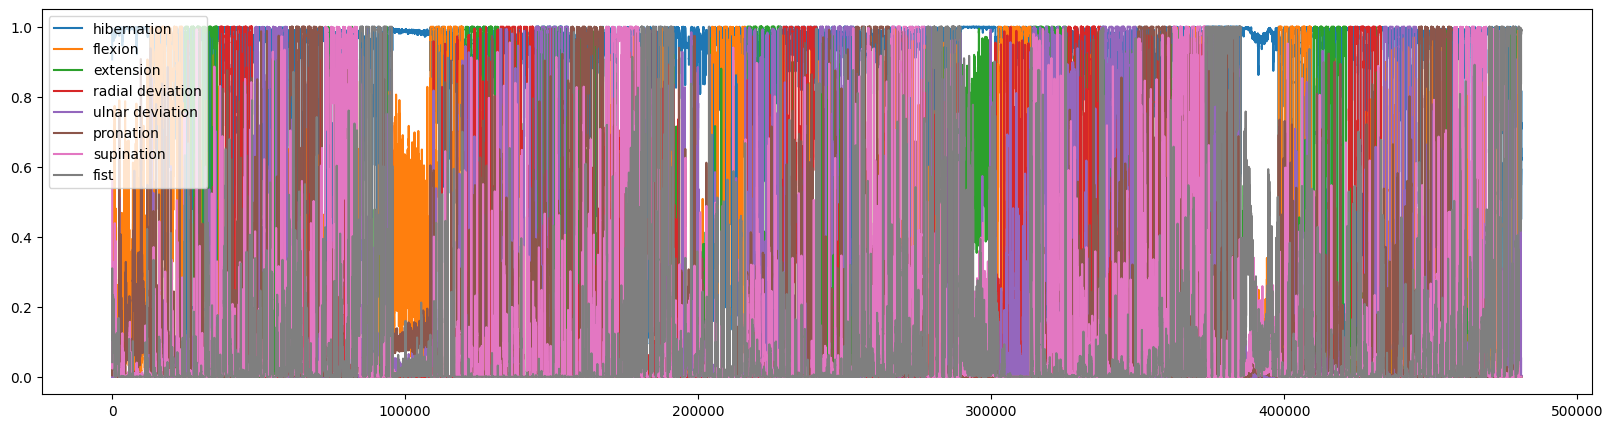

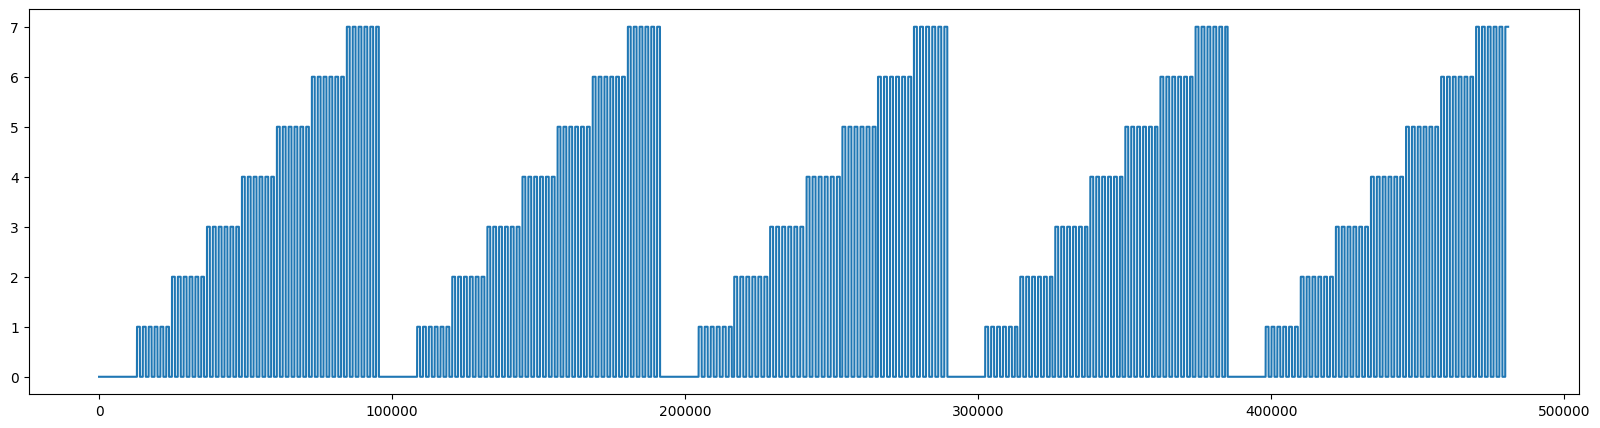

In [19]:
plt.figure()
plt.plot(training_analysis)
plt.legend(legend, loc = "upper left")
plt.figure()
plt.plot(train_labels)

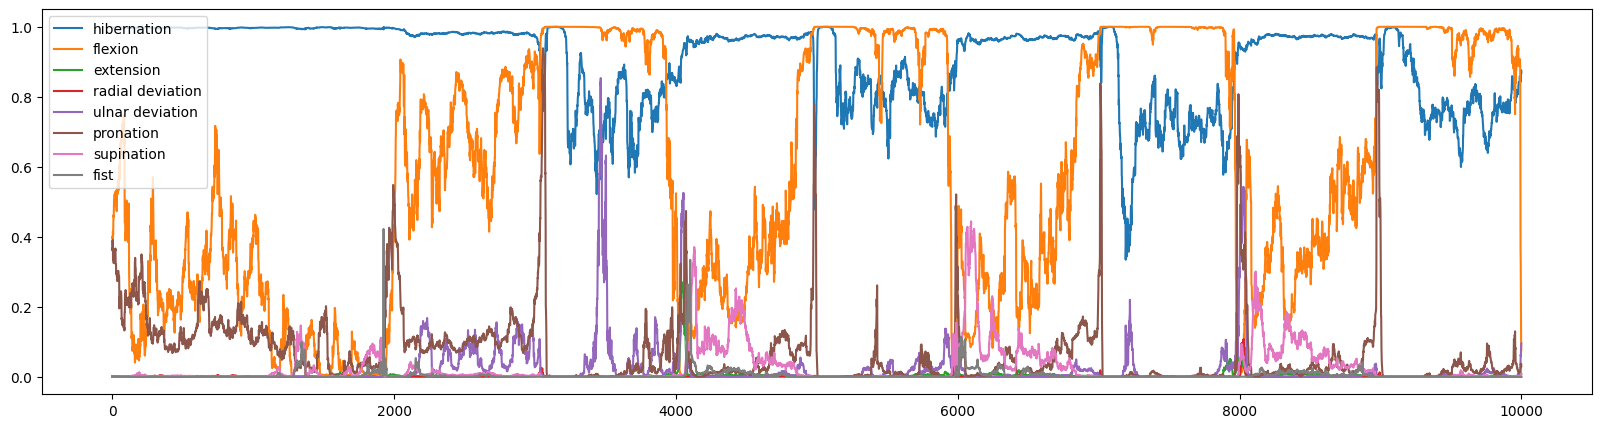

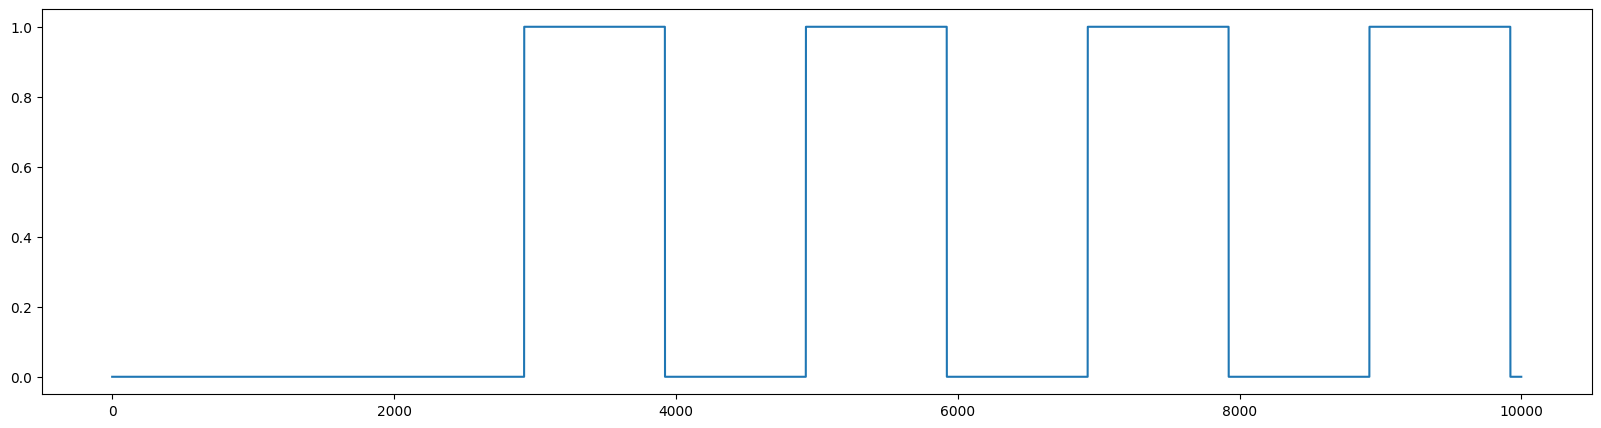

In [20]:
plt.figure()
plt.plot(training_analysis[10000:20000])
plt.legend(legend, loc = "upper left")
plt.figure()
plt.plot(train_labels[10000:20000])